# Predicting Depression Project

### 1.1 Problem Definition

In our case, the problem we will be exploring is **binary classification**.

In a statement,

*Given clinical parameters about a patient, can we predict whether or not they have depression?*

### 1.2 Data

We are going to use the kaggle dataset which can be found [here](https://www.kaggle.com/competitions/playground-series-s4e11/data?select=test.csv)

### 1.3 Evaluation

We are going to use Accuracy to evaluate the model

### 1.4 Features and Target

#### Features:
1. id
2. Name
3. Gender
4. Age
5. City
6. Working Professional or Student
7. Profession
8. Academic Pressure
9. Work Pressure
10. CGPA
11. Study Satisfaction
12. Job Satisfaction
13. Sleep Duration
14. Dietary Habits
15. Degree
16. Have you ever had suicidal thoughts ?
17. Work/Study Hours
18. Financial Stress
19. Family History of Mental Illness

#### Target:
1. Depression

## Imports

We are going to import the libaries we are going to use throughout the project in this section

In [56]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Models (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron

# Nearest Neighbors (Classification)
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Models (Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Support Vector Machines (Classification)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

# Naive Bayes Models (Classification)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

# Neural Networks (Classification)
from sklearn.neural_network import MLPClassifier

# Discriminant Analysis (Classification)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Gaussian Processes (Classification)
from sklearn.gaussian_process import GaussianProcessClassifier

# External Libraries (Classification)
from xgboost import XGBClassifier
try:
    from catboost import CatBoostClassifier
except ImportError:
    !pip install catboost
    from catboost import CatBoostClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## Saving to github
from git import Repo
import os
import joblib

## Voting
from scipy.stats import mode

## Data Exploration

In this section we download the data and explore the data

In [2]:
# Import the train dataset
train_csv = pd.read_csv('https://raw.githubusercontent.com/Hero988/Depression-Prediction/refs/heads/main/Depression-Dataset/train.csv')
# Import the test dataset
test_csv = pd.read_csv ('https://raw.githubusercontent.com/Hero988/Depression-Prediction/refs/heads/main/Depression-Dataset/test.csv')

### Data Exploration

In [3]:
# Show the head of the train dataset
train_csv.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Perform data analysis and manipulation on the train and test datasets

In [4]:
# Get info for the train dataset
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
# Create a copy of the train and test datasets
train_df = train_csv.copy()
test_df = test_csv.copy()

In [6]:
# Check missing values
train_df.isna().sum().sort_values(ascending=False)

,0
Study Satisfaction,112803
Academic Pressure,112803
CGPA,112802
Profession,36630
Work Pressure,27918
Job Satisfaction,27910
Dietary Habits,4
Financial Stress,4
Degree,2
Family History of Mental Illness,0


In [7]:
# Check for which numeric columns have null values
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: id | Has missing values: False
Column name: Age | Has missing values: False
Column name: Academic Pressure | Has missing values: True
Column name: Work Pressure | Has missing values: True
Column name: CGPA | Has missing values: True
Column name: Study Satisfaction | Has missing values: True
Column name: Job Satisfaction | Has missing values: True
Column name: Work/Study Hours | Has missing values: False
Column name: Financial Stress | Has missing values: True
Column name: Depression | Has missing values: False


## Data Manipulation

In this section we get the data ready for data modelling

#### Data Preprocessing function

In [8]:
def data_preprocessing(data):
    """
    Preprocesses a pandas DataFrame by:
    1. Converting object columns to categorical type.
    2. Encoding categorical variables as numeric codes.
    3. Creating binary "is_missing" columns for missing values.
    4. Filling missing numeric values with the column median.

    Args:
        data (pd.DataFrame): The input DataFrame to preprocess.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: The preprocessed DataFrame.
            - dict: A dictionary mapping categorical columns to their original category-value mappings.
    """
    # Dictionary to store category-value mappings for categorical columns
    column_to_category_dict = {}

    # Step 1: Convert object columns to categorical
    for label, content in data.items():
        if pd.api.types.is_object_dtype(content):
            data[label] = data[label].astype("category")

    # Step 2: Encode categorical variables as numeric
    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Create binary "is_missing" column for missing values
            data[label + "_is_missing"] = pd.isnull(content).astype(int)

            # Convert to categorical and get codes (handle NaN by shifting codes)
            content_categories = pd.Categorical(content)
            content_category_codes = content_categories.codes + 1  # Treat NaN as 0

            # Store the mapping of codes to categories
            column_to_category_dict[label] = dict(
                zip(content_category_codes, content_categories)
            )

            # Replace original column with numeric codes
            data[label] = content_category_codes

    # Step 3: Handle missing values in numeric columns
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            # Create binary "is_missing" column for missing values
            data[label + "_is_missing"] = pd.isnull(content).astype(int)

            # Fill missing values with column median (this can be anything but we are using the median to start)
            data[label] = content.fillna(content.median())

    # Return the preprocessed data and category mappings
    return data, column_to_category_dict

In [9]:
train_df_preprocessed, train_df_column_to_category_dict = data_preprocessing(train_df)

In [10]:
train_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 36 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   id                                                140700 non-null  int64  
 1   Name                                              140700 non-null  int16  
 2   Gender                                            140700 non-null  int8   
 3   Age                                               140700 non-null  float64
 4   City                                              140700 non-null  int8   
 5   Working Professional or Student                   140700 non-null  int8   
 6   Profession                                        140700 non-null  int8   
 7   Academic Pressure                                 140700 non-null  float64
 8   Work Pressure                                     140700 non-null  float64
 9   CGPA

In [11]:
# Check the first 10 Sleep Duration column values
for key, value in sorted(train_df_column_to_category_dict["Sleep Duration"].items())[:10]:
    print(f"{key} -> {value}")

1 -> 1-2 hours
2 -> 1-3 hours
3 -> 1-6 hours
4 -> 10-11 hours
5 -> 10-6 hours
6 -> 2-3 hours
7 -> 3-4 hours
8 -> 3-6 hours
9 -> 35-36 hours
10 -> 4-5 hours


## Train Baseline Models

In this section we get the top 10 best models

In [12]:
import warnings
warnings.filterwarnings("ignore")

### Train Baeline Function

In [13]:
def train_baseline_models(X, y):
    """
    Trains a variety of baseline classification models on the given dataset.

    Args:
        X (pd.DataFrame or np.array): Features.
        y (pd.Series or np.array): Target labels.

    Returns:
        dict: A dictionary with model names as keys and accuracy scores as values.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "LogisticRegression": LogisticRegression(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
        "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
        "Perceptron": Perceptron(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "ExtraTreesClassifier": ExtraTreesClassifier(),
        "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "NuSVC": NuSVC(),
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "ComplementNB": ComplementNB(),
        "CategoricalNB": CategoricalNB(),
        "MLPClassifier": MLPClassifier(max_iter=1000),
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
        "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
        "GaussianProcessClassifier": GaussianProcessClassifier(),
        "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoostClassifier": CatBoostClassifier(verbose=0)
    }

    # Dictionary to store model scores
    model_scores = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        try:
            # Train the model
            model.fit(X_train, y_train)
            # Predict on test data
            y_pred = model.predict(X_test)
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            # Store the accuracy score
            model_scores[model_name] = accuracy
        except Exception as e:
            # Handle exceptions for models that fail
            print(f"Model {model_name} failed to train: {e}")

    return model_scores

### Function to plot the scores on a bar chart (Only the top 10)

In [14]:
def plot_model_scores(scores, title="Model Accuracy Comparison"):
    """
    Plots a bar graph of the top 10 models and their accuracy scores.

    Args:
        scores (dict): A dictionary with model names as keys and accuracy scores as values.
        title (str): The title of the bar graph. Default is "Model Accuracy Comparison".

    Returns:
        None: Displays the plot.
    """
    # Sort the dictionary by accuracy scores in descending order and keep the top 10
    sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10])

    # Unpack top 10 model names and accuracy scores
    model_names = list(sorted_scores.keys())
    accuracy_scores = list(sorted_scores.values())

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, accuracy_scores, color="skyblue")
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability

    # Annotate bars with accuracy values
    for index, value in enumerate(accuracy_scores):
        value_percentage = value * 100
        # Adjust position to avoid going off the page
        plt.text(value - 0.05, index, f"{value_percentage:.2f}%", va='center', ha='right', color="black")

    # Display the plot
    plt.tight_layout()
    plt.show()


Model NuSVC failed to train: specified nu is infeasible
Model CategoricalNB failed to train: index 140694 is out of bounds for axis 1 with size 140683


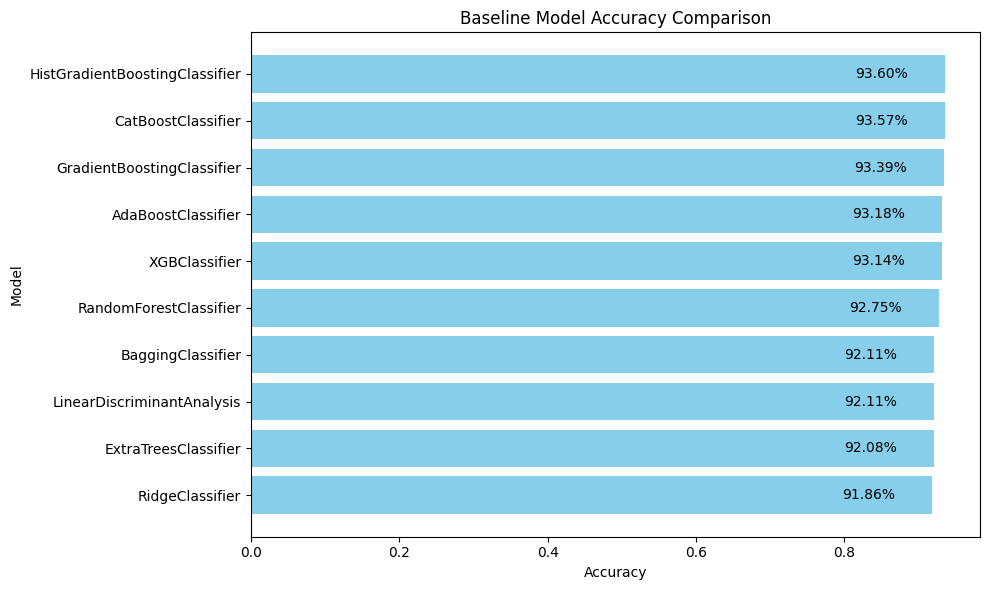

In [15]:
# Find the length of the train_df
length_of_train_df_preprocessed = len(train_df_preprocessed)

# Calculate 10% of the length of the train_df
ten_percent = int(length_of_train_df_preprocessed * 0.1)

# Sample 10% samples to make sure that we can perform experiments fast
df_train_df_sample_10_percent = train_df_preprocessed.sample(n=ten_percent, random_state=42)

X_10_percent = df_train_df_sample_10_percent.drop("Depression", axis=1)
y_10_percent = df_train_df_sample_10_percent["Depression"]

# Train baseline models and get accuracy scores
scores = train_baseline_models(X_10_percent, y_10_percent)

# Call the function with your dictionary
plot_model_scores(scores, title="Baseline Model Accuracy Comparison")

## Find the Best model On all the dataset

Now that we have the top 10 best models we go through each one using cross validation on all of the data and then perfrom a croos validate score on the best params and then save the model

### Catboost Optimization Using RandomizedSearchCV

In [16]:
X = train_df_preprocessed.drop("Depression", axis=1)
y = train_df_preprocessed["Depression"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
cat_grid = {
    'iterations': [100, 200, 500, 1000],  # Number of boosting iterations
    'learning_rate': [0.01, 0.03, 0.1, 0.2],  # Step size shrinkage
    'depth': [4, 6, 8, 10],  # Depth of the tree
    'l2_leaf_reg': [1, 3, 5, 7],  # L2 regularization
    'bagging_temperature': [0, 1, 2, 3],  # Controls subsampling
    'random_strength': [1, 5, 10, 20],  # Noise for splitting score
    'max_bin': [200, 300, 500],  # Maximum number of bins for discretizing continuous features
    'scale_pos_weight': [1, 2, 5],  # Class balancing for imbalanced datasets
}

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0)

# Create the RandomizedSearchCV object
cat_model = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=cat_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    random_state=42,
    #n_jobs=,  # Use all available cores
    verbose=3
)

# Fit RandomizedSearchCV
cat_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_temperature=1, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, max_bin=500, random_strength=5, scale_pos_weight=1;, score=0.937 total time=  16.6s
[CV 2/5] END bagging_temperature=1, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, max_bin=500, random_strength=5, scale_pos_weight=1;, score=0.939 total time=  15.8s
[CV 3/5] END bagging_temperature=1, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, max_bin=500, random_strength=5, scale_pos_weight=1;, score=0.938 total time=  15.5s
[CV 4/5] END bagging_temperature=1, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, max_bin=500, random_strength=5, scale_pos_weight=1;, score=0.938 total time=  15.1s
[CV 5/5] END bagging_temperature=1, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, max_bin=500, random_strength=5, scale_pos_weight=1;, score=0.937 total time=  15.7s
[CV 1/5] END bagging_temperature=0, d

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7d8984a0d540>,
                   n_iter=100,
                   param_distributions={'bagging_temperature': [0, 1, 2, 3],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 200, 500, 1000],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.01, 0.03, 0.1, 0.2],
                                        'max_bin': [200, 300, 500],
                                        'random_strength': [1, 5, 10, 20],
                                        'scale_pos_weight': [1, 2, 5]},
                   random_state=42, scoring='accuracy', verbose=3)

In [35]:
# 1. Train and Save the Model Locally
# Retrieve the best parameters
best_params = cat_model.best_params_
print("Best Parameters:", best_params)

# Initialize CatBoostClassifier with the best parameters
best_catboost_model = CatBoostClassifier(**best_params, verbose=0)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_catboost_model, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Fit the model on the entire training data
best_catboost_model.fit(X_train, y_train)

# Save the trained model locally
model_filename = "best_catboost_model.cbm"
best_catboost_model.save_model(model_filename)
print(f"Model saved locally as {model_filename}")


Best Parameters: {'scale_pos_weight': 1, 'random_strength': 10, 'max_bin': 300, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 2}
Cross-validation accuracy scores: [0.93710021 0.94211976 0.9411425  0.94109808 0.93834399]
Mean cross-validation accuracy: 0.9399609097370292
Model saved locally as best_catboost_model.cbm


In [18]:
test_df_preprocessed_data, test_df_column_to_category_dict = data_preprocessing(test_df)

In [24]:
# Add the new column and set all values to 0
test_df_preprocessed_data["Financial Stress_is_missing"] = 0

In [47]:
# Path to the CatBoost model file
catboost_model_path = "best_catboost_model.cbm"

# Load the CatBoost model
catboost_model = CatBoostClassifier()
catboost_model.load_model(catboost_model_path)

In [48]:
test_preds_cat_model = catboost_model.predict(test_df_preprocessed_data)

In [49]:
test_preds_cat_model[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [28]:
test_df_preprocessed_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Dietary Habits_is_missing,Degree_is_missing,Have you ever had suicidal thoughts ?_is_missing,Family History of Mental Illness_is_missing,Academic Pressure_is_missing,Work Pressure_is_missing,CGPA_is_missing,Study Satisfaction_is_missing,Job Satisfaction_is_missing,Financial Stress_is_missing
0,140700,289,2,53.0,68,2,28,3.0,2.0,7.80,...,0,0,0,0,1,0,1,1,0,0
1,140701,280,1,58.0,26,2,20,3.0,2.0,7.80,...,0,0,0,0,1,0,1,1,0,0
2,140702,366,2,53.0,22,2,57,3.0,4.0,7.80,...,0,0,0,0,1,0,1,1,0,0
3,140703,192,1,23.0,48,1,0,5.0,3.0,6.84,...,0,0,0,0,0,1,0,0,1,0
4,140704,286,2,47.0,23,2,57,3.0,5.0,7.80,...,0,0,0,0,1,0,1,1,0,0


In [50]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df = pd.DataFrame()
pred_df["id"] = test_df_preprocessed_data["id"]
pred_df["Depression"] = test_preds_cat_model

# Display the updated DataFrame
print(pred_df.sample(5))

           id  Depression
56045  196745           0
51292  191992           0
83759  224459           0
73916  214616           0
72456  213156           0


In [51]:
pred_df.to_csv('test_preds_cat_model.csv', index=False)

### Catboost Optimization Using HistGradientBoostingClassifier

In [41]:
X = train_df_preprocessed.drop("Depression", axis=1)
y = train_df_preprocessed["Depression"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
hist_grid = {
    'learning_rate': [0.01, 0.03, 0.1, 0.2],  # Step size shrinkage
    'max_iter': [100, 200, 500],  # Number of boosting iterations
    'max_depth': [3, 5, 7, 10],  # Maximum depth of trees
    'l2_regularization': [0.1, 1, 10],  # L2 regularization
    'max_bins': [255, 512],  # Number of bins for discretizing continuous features
    'min_samples_leaf': [10, 20, 50],  # Minimum samples per leaf
    'scoring': ['loss', 'accuracy'],  # Scoring metric
}

# Initialize HistGradientBoostingClassifier
hist_model = HistGradientBoostingClassifier(verbose=0)

# Create the RandomizedSearchCV object
hist_model_search = RandomizedSearchCV(
    estimator=hist_model,
    param_distributions=hist_grid,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    random_state=42,
    verbose=3,
    #n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
hist_model_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END l2_regularization=1, learning_rate=0.01, max_bins=255, max_depth=5, max_iter=100, min_samples_leaf=50, scoring=accuracy;, score=0.819 total time=   0.4s
[CV 2/5] END l2_regularization=1, learning_rate=0.01, max_bins=255, max_depth=5, max_iter=100, min_samples_leaf=50, scoring=accuracy;, score=0.819 total time=   0.4s
[CV 3/5] END l2_regularization=1, learning_rate=0.01, max_bins=255, max_depth=5, max_iter=100, min_samples_leaf=50, scoring=accuracy;, score=0.819 total time=   0.3s
[CV 4/5] END l2_regularization=1, learning_rate=0.01, max_bins=255, max_depth=5, max_iter=100, min_samples_leaf=50, scoring=accuracy;, score=0.819 total time=   0.4s
[CV 5/5] END l2_regularization=1, learning_rate=0.01, max_bins=255, max_depth=5, max_iter=100, min_samples_leaf=50, scoring=accuracy;, score=0.819 total time=   0.3s
[CV 1/5] END l2_regularization=10, learning_rate=0.01, max_bins=255, max_depth=7, max_iter=500, min_samples

RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   param_distributions={'l2_regularization': [0.1, 1, 10],
                                        'learning_rate': [0.01, 0.03, 0.1, 0.2],
                                        'max_bins': [255, 512],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_iter': [100, 200, 500],
                                        'min_samples_leaf': [10, 20, 50],
                                        'scoring': ['loss', 'accuracy']},
                   random_state=42, scoring='accuracy', verbose=3)

In [42]:
# Retrieve the best parameters
best_params_hist = hist_model_search.best_params_
print("Best Parameters:", best_params_hist)

# Initialize HistGradientBoostingClassifier with the best parameters
best_hist_model = HistGradientBoostingClassifier(**best_params_hist)

# Perform cross-validation to evaluate the model
cv_scores_hist = cross_val_score(best_hist_model, X_train, y_train, cv=5, scoring='accuracy')

# Output cross-validation results
print("Cross-validation accuracy scores:", cv_scores_hist)
print("Mean cross-validation accuracy:", cv_scores_hist.mean())

# Fit the model on the entire training data
best_hist_model.fit(X_train, y_train)

# Save the trained model locally using joblib
model_filename = "best_hist_model.joblib"
joblib.dump(best_hist_model, model_filename)
print(f"Model saved locally as {model_filename}")

Best Parameters: {'scoring': 'loss', 'min_samples_leaf': 20, 'max_iter': 500, 'max_depth': 3, 'max_bins': 255, 'learning_rate': 0.1, 'l2_regularization': 10}
Cross-validation accuracy scores: [0.93590085 0.94171997 0.93994314 0.94056503 0.93798863]
Mean cross-validation accuracy: 0.939223525230988
Model saved locally as best_hist_model.joblib


In [52]:
# Path to the HistGradientBoosting model file
hist_model_path = "best_hist_model.joblib"

# Load the HistGradientBoosting model
hist_model = joblib.load(hist_model_path)

In [53]:
test_preds_hist_model = hist_model.predict(test_df_preprocessed_data)

In [54]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df_hist = pd.DataFrame()
pred_df_hist["id"] = test_df_preprocessed_data["id"]
pred_df_hist["Depression"] = test_preds_hist_model

# Display the updated DataFrame
print(pred_df_hist.sample(5))

           id  Depression
29988  170688           0
13492  154192           0
35847  176547           0
20689  161389           0
7475   148175           0


In [55]:
pred_df_hist.to_csv('test_preds_hist_model.csv', index=False)

In [59]:
# Predictions on test_df_preprocessed_data
hist_preds_test = hist_model.predict(test_df_preprocessed_data)

# Predictions on test_df_preprocessed_data
hist_preds_new = hist_model.predict(test_df_preprocessed_data)

# Combine predictions into a single array
combined_preds = np.vstack((hist_preds_test, hist_preds_new)).T

# Perform voting (mode) for each row of combined predictions
final_preds = mode(combined_preds, axis=1).mode.flatten()

# Output the final predictions
final_preds[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [60]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df_combined = pd.DataFrame()
pred_df_combined["id"] = test_df_preprocessed_data["id"]
pred_df_combined["Depression"] = final_preds

# Display the updated DataFrame
print(pred_df.sample(5))

           id  Depression
76010  216710           0
71865  212565           0
69206  209906           0
1183   141883           0
86775  227475           0


In [61]:
pred_df_combined.to_csv('test_preds_hist_and_cat_combined_model.csv', index=False)